## Species represented in AngleCam V1 and V2 training and validation data set

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import OrderedDict
import os 
import glob
from typing import Union

# Get project directory
PROJECT_DIR = Path.cwd().parent.parent.parent
print(f"Project directory: {PROJECT_DIR}")

# Plots
plt.rcParams["figure.dpi"] = 300

# Data path
DATA_PATH = PROJECT_DIR / "data" / "01_Training_Validation_Data" / "splits"
FIGURE_DIR = PROJECT_DIR / "data" / "other" / "figures" / "methods"

Project directory: /mnt/data/lk1167/projects/AngleCamV2


In [2]:
# Load data AngleCamV1
anglecam_v1 = pd.read_csv(
    DATA_PATH / "model_version_V1" / "anglecamV1_training_validation.csv", sep=","
)

# Load data V2
anglecam_v2_train = pd.read_csv(DATA_PATH / "training.csv", sep=",")
anglecam_v2_val = pd.read_csv(DATA_PATH / "validation.csv", sep=",")
anglecam_v2_phylo = pd.read_csv(DATA_PATH / "phylo.csv", sep=",")

## Merge V2 data
anglecam_v2 = pd.concat([anglecam_v2_train, anglecam_v2_val, anglecam_v2_phylo])

### Cumulative plot

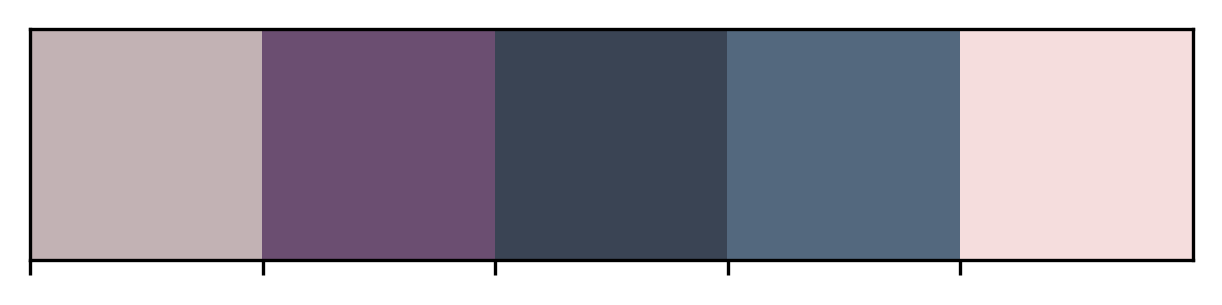

In [9]:
# Colors
#colors = ["#BCF8EC", "#AED9E0", "#9FA0C3", "#8B687F ", "#7B435B"]
custom_colors = ["#C2B2B4", "#6B4E71", "#3A4454", "#53687E", "#F5DDDD"]

# Create color palette
custom_palette = sns.color_palette(custom_colors)

sns.palplot(custom_palette)
plt.show()

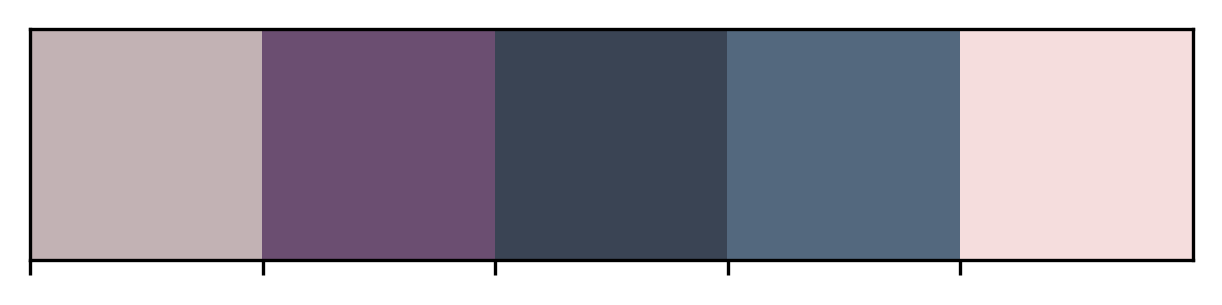

In [10]:
# Colors 
custom_colors = ["#F1F1FE", "#9492B9", "#AFBFCD", "#3A739D", "#ADC0A8"]

# Create color palette
custom_palette2 = sns.color_palette(custom_colors)

sns.palplot(custom_palette)
plt.show()

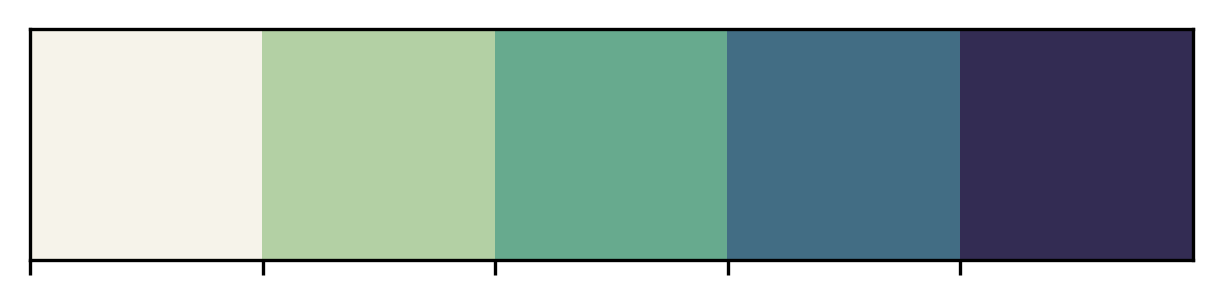

In [11]:
# Modern, distinct cubehelix-inspired colors
cubehelix_palette = sns.cubehelix_palette(
    n_colors=5,  # 2–3 lines
    start=0.5,  # Shifted to add a touch of modern purple-pink hue
    rot=-0.75,  # Reversed rotation for richer color transitions
    light=0.95,  # Keep it light but visible
    dark=0.2,  # Ensures contrast
    gamma=1.0,  # Linear brightness progression
)

# Preview the palette
sns.palplot(cubehelix_palette)
plt.show()

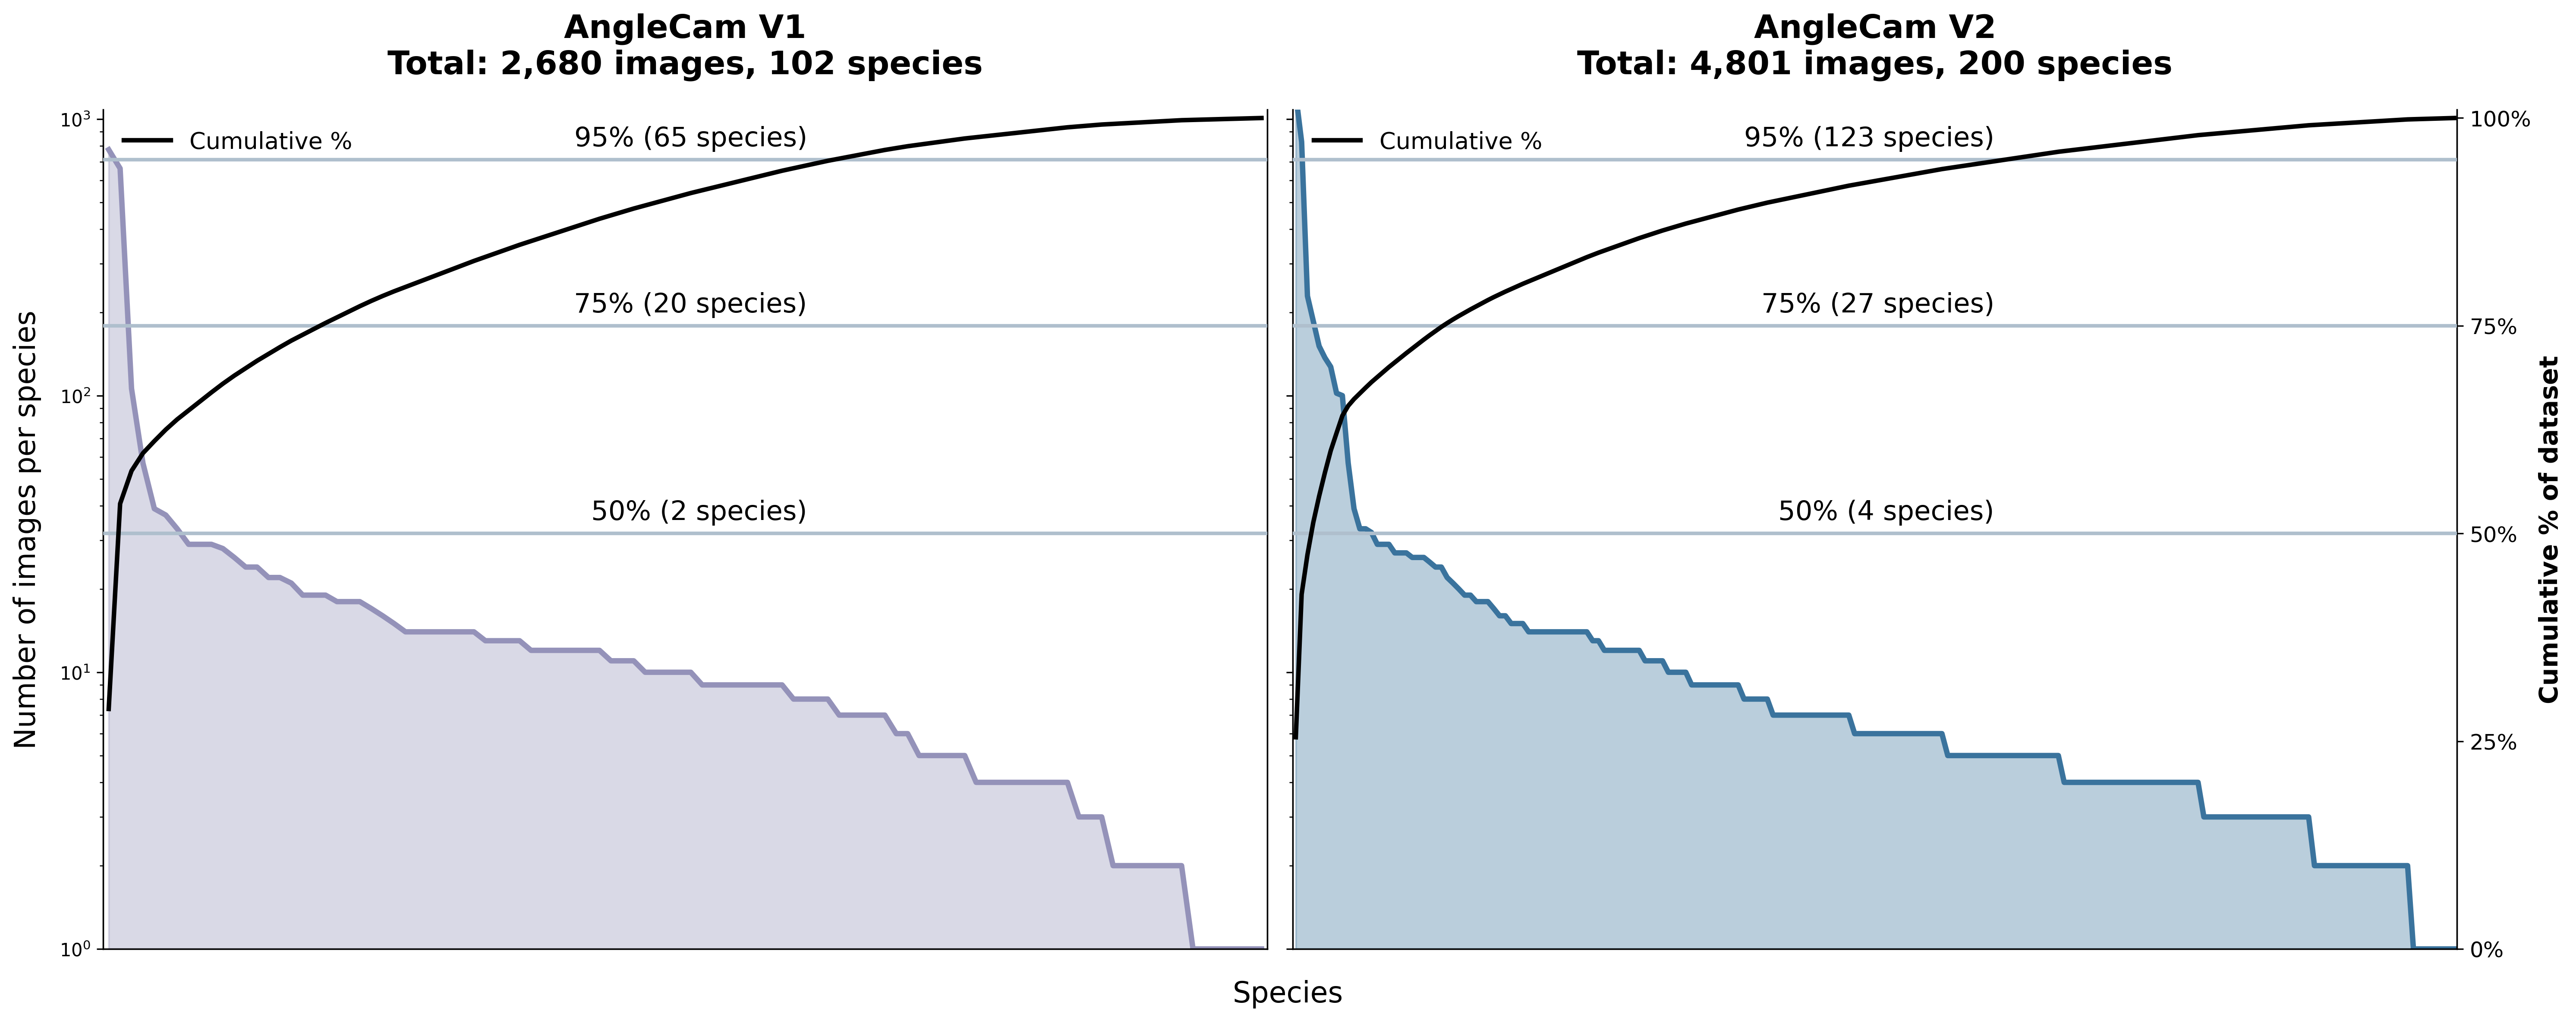

In [6]:
# Different species count on the x-axis (max of each datasets)
dfs = OrderedDict([("AngleCam V1", anglecam_v1), ("AngleCam V2", anglecam_v2)])

# Create the figure and two panels
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True, sharex=False)

for i, (ax1, (label, df_)) in enumerate(zip(axes, dfs.items())):
    # Compute species counts and totals
    species_counts = df_["species"].value_counts().sort_values(ascending=False)
    total_images = len(df_)
    x = np.arange(len(species_counts))

    # Create twin axis for both panels
    ax2 = ax1.twinx()

    # Calculate cumulative percentage for both panels
    cum_pct = species_counts.cumsum() / total_images * 100

    if i == 0:
        # Left plot
        # colors = plt.cm.tab10.colors[0]
        colors = custom_palette2[1]
        ax1.semilogy(x, species_counts.values, color=colors, linewidth=3, zorder=2)
        ax1.fill_between(
            x, species_counts.values, 1, color=colors, alpha=0.35, zorder=1
        )

        # Add cumulative percentage line
        ax2.plot(
            x,
            cum_pct,
            "-",
            color="black",
            linewidth=2.5,
            label="Cumulative %",
            zorder=4,
        )

        # Add horizontal reference lines
        for pct in [50, 75, 95]:
            idx = np.argmax(cum_pct >= pct)
            ax2.axhline(
                pct,
                linestyle="-",
                color=custom_palette2[2],
                alpha=1.0,
                linewidth=2,
                zorder=3,
            )
            ax2.text(
                len(species_counts) * 0.6,
                pct + 1,
                f"{pct}% ({idx+1} species)",
                fontsize=15,
                va="bottom",
                ha="right",
            )

        # Clean up axes
        ax1.set_xticks([])
        ax1.set_ylabel("Number of images per species", fontsize=16, labelpad=10)
        ax1.set_title(
            f"{label}\n"
            f"Total: {total_images:,} images, {len(species_counts):,} species",
            fontsize=18,
            pad=20,
            fontweight="bold",
        )

        # Set up the right y-axis for cumulative percentage
        ax2.set_ylim(0, 101)
        ax2.set_yticks([])
        ax2.set_yticklabels([], fontsize=12)

        ax1.set_xlim(-0.5, len(species_counts) - 0.5)
        ax1.set_ylim(bottom=1)

        ax1.spines["top"].set_visible(False)
        ax2.spines["top"].set_visible(False)

    else:
        # Right plot
        # colors = plt.cm.tab10.colors[2]
        colors = custom_palette2[3]
        ax1.semilogy(x, species_counts.values, color=colors, linewidth=3, zorder=2)
        ax1.fill_between(
            x, species_counts.values, 1, color=colors, alpha=0.35, zorder=1
        )

        # Add cumulative percentage line
        ax2.plot(
            x,
            cum_pct,
            "-",
            color="black",
            linewidth=2.5,
            label="Cumulative %",
            zorder=4,
        )

        # Add horizontal reference lines
        for pct in [50, 75, 95]:
            idx = np.argmax(cum_pct >= pct)
            ax2.axhline(
                pct,
                linestyle="-",
                color=custom_palette2[2],
                alpha=1.0,
                linewidth=2,
                zorder=3,
            )
            ax2.text(
                len(species_counts) * 0.6,
                pct + 1,
                f"{pct}% ({idx+1} species)",
                fontsize=15,
                va="bottom",
                ha="right",
            )

        # Clean up axes
        ax1.set_xticks([])
        ax2.set_ylabel("Cumulative % of dataset", fontsize=14, fontweight="bold")
        ax2.set_ylim(0, 101)
        ax2.set_yticks([0, 25, 50, 75, 100])
        ax2.set_yticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=12)
        ax1.set_title(
            f"{label}\n"
            f"Total: {total_images:,} images, {len(species_counts):,} species",
            fontsize=18,
            pad=20,
            fontweight="bold",
        )
        ax1.set_xlim(-0.5, len(species_counts) - 0.5)
        ax1.set_ylim(bottom=1)

        ax1.spines["top"].set_visible(False)
        ax2.spines["top"].set_visible(False)

    # Add legend to each panel
    h, l = ax2.get_legend_handles_labels()
    ax2.legend(h, l, loc="upper left", fontsize=13, frameon=False)

# Add single x-label for both panels
fig.supxlabel("Species", fontsize=16, y=0.02)

plt.tight_layout()
# plt.savefig(FIGURE_DIR / "species_distribution_V1_V2.png", dpi=400, bbox_inches='tight')
plt.show()

In [8]:
anglecam_v1["species"].value_counts()

species
Tilia platyphyllos      774
Acer pseudoplatanus     662
Rhododendron maximum    106
Crataegus germanica      57
Morisonia flexuosa       39
                       ... 
Sorbus aucuparia          1
Vaccinium ovatum          1
Salix hastata             1
Aria edulis               1
Crataegus monogyna        1
Name: count, Length: 102, dtype: int64

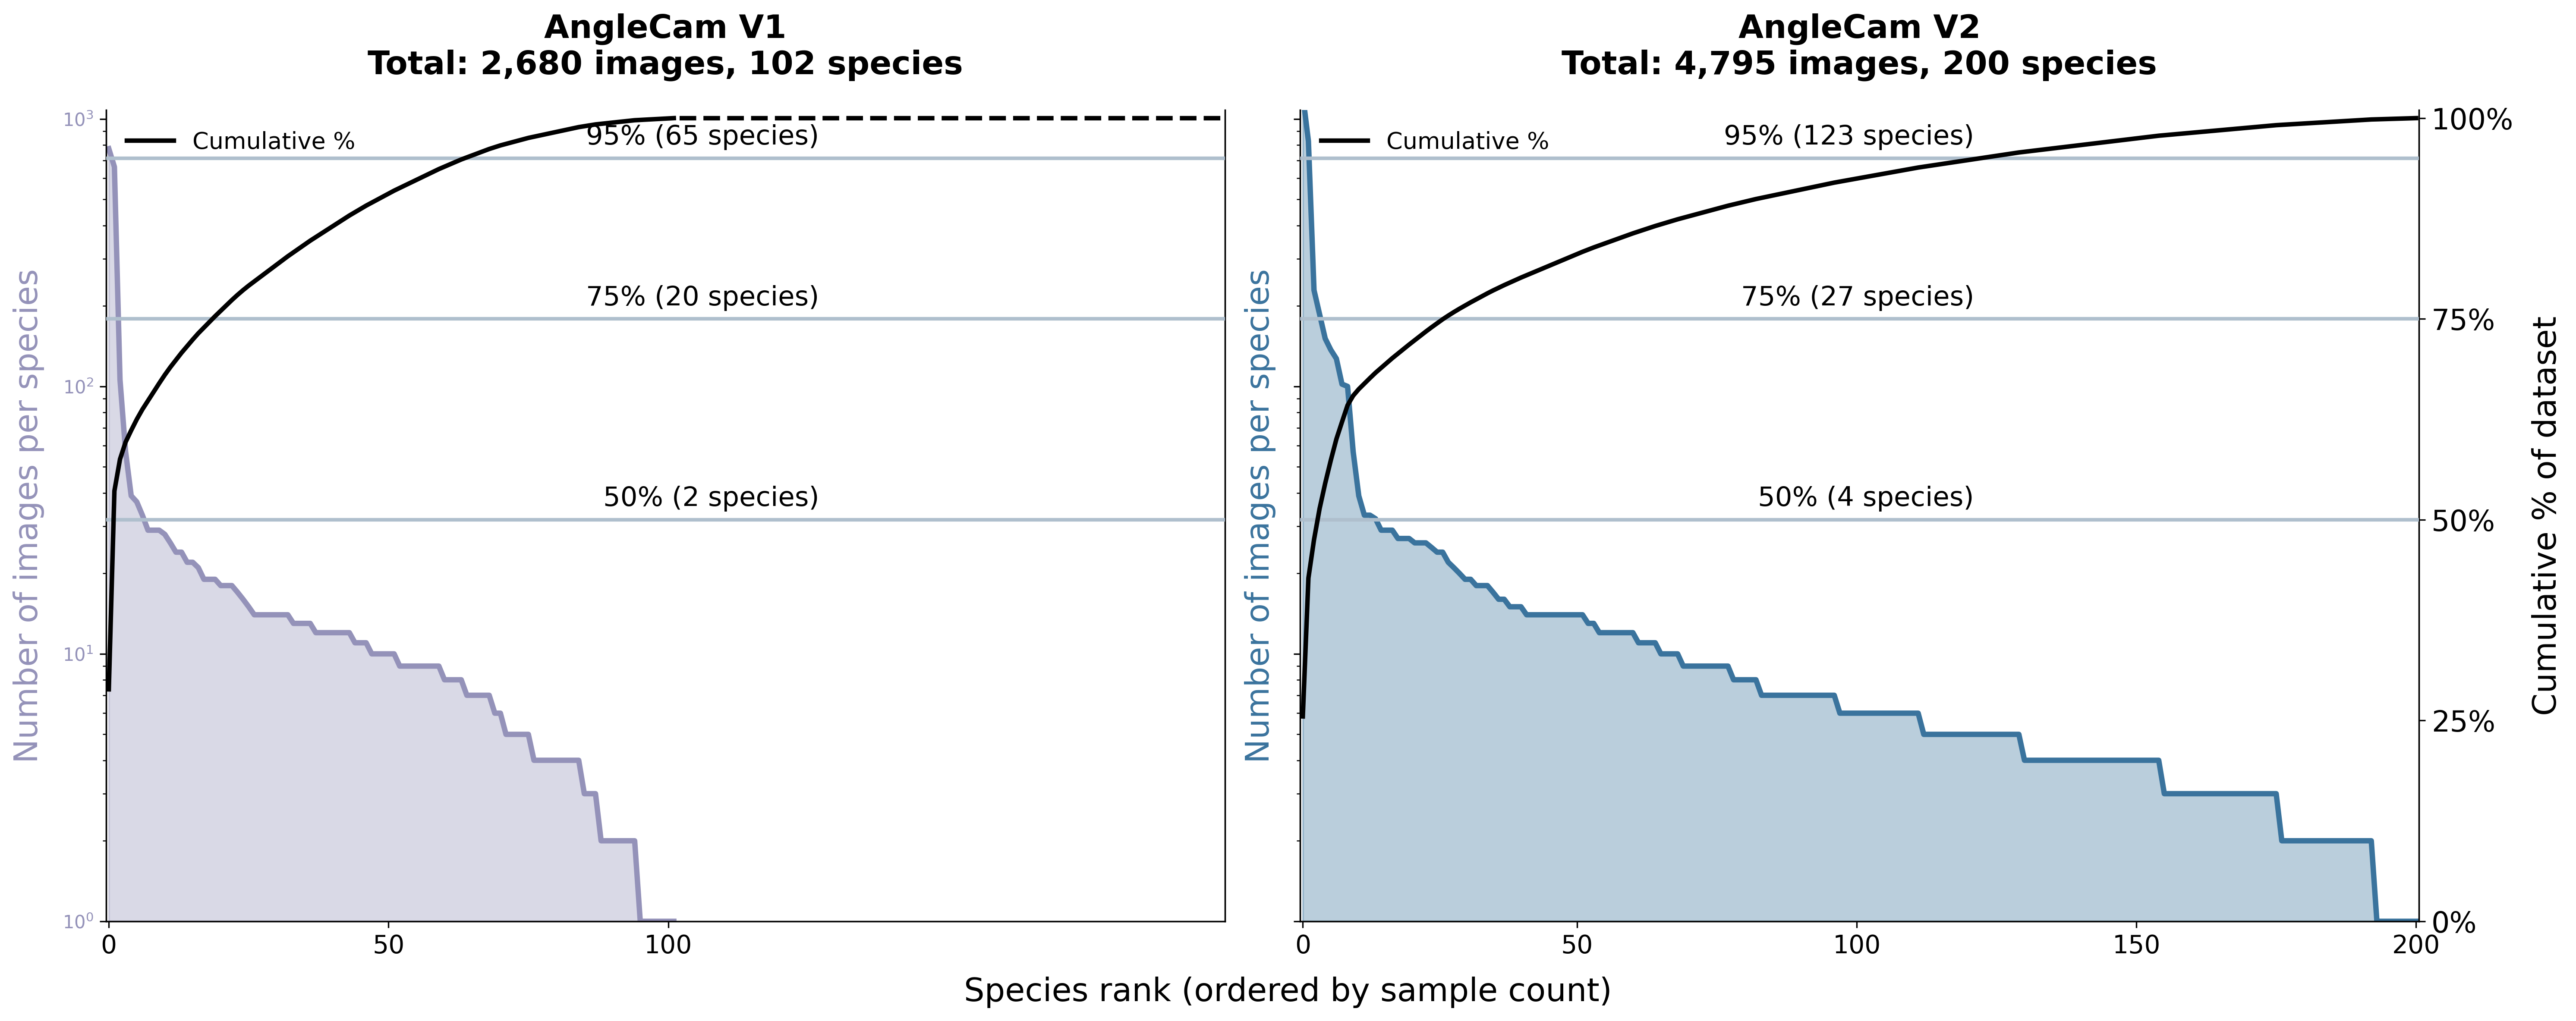

In [12]:
# Same species count on the x-axis (max of both datasets)
dfs = OrderedDict([("AngleCam V1", anglecam_v1), ("AngleCam V2", anglecam_v2)])

# Calculate max species count across both datasets for consistent x-range
max_species_count = max(len(df["species"].value_counts()) for df in dfs.values())

# Create the figure and two panels
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True, sharex=False)

for i, (ax1, (label, df_)) in enumerate(zip(axes, dfs.items())):
    # Compute species counts and totals
    species_counts = df_["species"].value_counts().sort_values(ascending=False)
    total_images = len(df_)
    x = np.arange(len(species_counts))

    # Create twin axis for both panels
    ax2 = ax1.twinx()

    # Calculate cumulative percentage for both panels
    cum_pct = species_counts.cumsum() / total_images * 100

    if i == 0:
        # Left plot
        colors = custom_palette2[1]
        ax1.semilogy(x, species_counts.values, color=colors, linewidth=3, zorder=2)
        ax1.fill_between(
            x, species_counts.values, 1, color=colors, alpha=0.35, zorder=1
        )

        # Extend the line to the end of x-axis at 100%
        if len(species_counts) < max_species_count:
            x_extended = np.arange(len(species_counts), max_species_count)
            cum_pct_extended = np.full(
                len(x_extended), 100
            )  # 100% for remaining x values
            ax2.plot(
                x_extended,
                cum_pct_extended,
                "--",
                color="black",
                linewidth=2.5,
                zorder=4,
            )

        # Add cumulative percentage line
        ax2.plot(
            x,
            cum_pct,
            "-",
            color="black",
            linewidth=2.5,
            label="Cumulative %",
            zorder=4,
        )

        # Add horizontal reference lines - extend to full x-axis range
        for pct in [50, 75, 95]:
            idx = np.argmax(cum_pct >= pct)
            ax2.axhline(
                pct,
                linestyle="-",
                color=custom_palette2[2],
                alpha=1.0,
                linewidth=2,
                zorder=3,
                xmin=0,
                xmax=1,
            )  # Extend line across full axis
            ax2.text(
                max_species_count * 0.635,
                pct + 1,
                f"{pct}% ({idx+1} species)",
                fontsize=15,
                va="bottom",
                ha="right",
            )

        # Clean up axes - add meaningful x-ticks
        x_ticks = [0, 50, 100]
        x_ticks = [x for x in x_ticks if x < len(species_counts)]
        ax1.set_xticks(x_ticks)
        ax1.set_xticklabels([f"{x}" for x in x_ticks], fontsize=14)
        
        # Color-coded y-axis labels
        ax1.set_ylabel("Number of images per species", fontsize=18, labelpad=10, color=colors)
        ax1.tick_params(axis='y', labelcolor=colors)
        ax1.set_title(
            f"{label}\n"
            f"Total: {total_images:,} images, {len(species_counts):,} species",
            fontsize=18,
            pad=20,
            fontweight="bold",
        )

        # Set up the right y-axis for cumulative percentage
        ax2.set_ylim(0, 101)
        ax2.set_yticks([])
        ax2.set_yticklabels([])

        # Set consistent x-range for both panels
        ax1.set_xlim(-0.5, max_species_count - 0.5)
        ax1.set_ylim(bottom=1)

        ax1.spines["top"].set_visible(False)
        ax2.spines["top"].set_visible(False)

    else:
        # Right plot
        colors = custom_palette2[3]
        ax1.semilogy(x, species_counts.values, color=colors, linewidth=3, zorder=2)
        ax1.fill_between(
            x, species_counts.values, 1, color=colors, alpha=0.35, zorder=1
        )

        # Add cumulative percentage line
        ax2.plot(
            x,
            cum_pct,
            "-",
            color="black",
            linewidth=2.5,
            label="Cumulative %",
            zorder=4,
        )

        # Add horizontal reference lines
        for pct in [50, 75, 95]:
            idx = np.argmax(cum_pct >= pct)
            ax2.axhline(
                pct,
                linestyle="-",
                color=custom_palette2[2],
                alpha=1.0,
                linewidth=2,
                zorder=3,
            )
            ax2.text(
                len(species_counts) * 0.6,
                pct + 1,
                f"{pct}% ({idx+1} species)",
                fontsize=15,
                va="bottom",
                ha="right",
            )

        # Clean up axes - add meaningful x-ticks
        x_ticks = [0, 49, 99, 149, 199]
        x_ticks = [x for x in x_ticks if x < len(species_counts)]
        ax1.set_xticks(x_ticks)
        ax1.set_xticklabels([f"{x+1}" if x != 0 else f"{x}" for x in x_ticks], fontsize=14)
        
        # Color-coded y-axis labels
        ax1.set_ylabel("Number of images per species", fontsize=18, labelpad=10, color=colors)
        ax1.tick_params(axis='y', labelcolor=colors)
        
        # Right y-axis for cumulative percentage
        ax2.set_ylabel("Cumulative % of dataset", fontsize=18, labelpad=10, color='black')
        ax2.set_ylim(0, 101)
        ax2.set_yticks([0, 25, 50, 75, 100])
        ax2.set_yticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=16, color='black')
        ax2.tick_params(axis='y', labelcolor='black')
        
        ax1.set_title(
            f"{label}\n"
            f"Total: {total_images:,} images, {len(species_counts):,} species",
            fontsize=18,
            pad=20,
            fontweight="bold",
        )
        # Set consistent x-range for both panels
        ax1.set_xlim(-0.5, max_species_count - 0.5)
        ax1.set_ylim(bottom=1)

        ax1.spines["top"].set_visible(False)
        ax2.spines["top"].set_visible(False)

    # Add legend to each panel
    h, l = ax2.get_legend_handles_labels()
    ax2.legend(h, l, loc="upper left", fontsize=13, frameon=False)

# Add single x-label for both panels
fig.supxlabel("Species rank (ordered by sample count)", fontsize=18, y=0.02)

plt.tight_layout()
#plt.savefig(FIGURE_DIR / "species_distribution_V1_V2.png", dpi=400, bbox_inches="tight")
plt.show()

## Overview of datasets used in AngleCam training and validation

In [8]:
DATA_DIR = Path("/mnt/data/lk1167/data/training_data/raw/training_data")

In [9]:
# LCC
search_dir01 = DATA_DIR / "training_lak_1_b_v1"
search_dir02 = DATA_DIR / "training_lak_1_l_v1"
search_dir03 = DATA_DIR / "training_lak_2_b_v1"
search_dir04 = DATA_DIR / "training_lak_2_l_v1"
search_dir05 = DATA_DIR / "training_lak_3_b_v1"
search_dir06 = DATA_DIR / "training_lak_3_l_v1"

# Leipzig area
search_dir07 = DATA_DIR / "potpurri_1"
search_dir08 = DATA_DIR / "potpurri_2"

# MyDiv
search_dir09 = DATA_DIR / "training_mydiv_2022_lars"
search_dir10 = DATA_DIR / "training_mydiv_2022_linus"
search_dir11 = DATA_DIR / "training_mydiv_2022_mara"
search_dir12 = DATA_DIR / "training_mydiv_2023_02_03_randomsamples"
search_dir13 = DATA_DIR / "training_mydiv_2023_02_16_randomsamples_a"
search_dir14 = DATA_DIR / "training_mydiv_2023_02_16_randomsamples_b"
search_dir15 = DATA_DIR / "training_mydiv_2023_03_03_randomsamples_arbofun"
search_dir16 = DATA_DIR / "training_mydiv_labels_lars_2023_02_03"

# Global collection (Jan Pisek)
search_dir17 = DATA_DIR / "pisek_Group E"
search_dir18 = DATA_DIR / "pisek_Group PG"
search_dir19 = DATA_DIR / "pisek_Group PL"
search_dir20 = DATA_DIR / "pisek_Group S"
search_dir21 = DATA_DIR / "pisek_Group U"

In [10]:
def analyze_species_from_directories(
    search_dirs: list, reference_data: Union[str, pd.DataFrame]
) -> dict:
    """Analyze species distribution from image directories by matching filenames with reference data."""

    def find_images(directory: str) -> list:
        """Find all image files in a directory and its subdirectories."""
        if not os.path.exists(directory):
            print(f"Warning: Directory does not exist: {directory}")
            return []

        image_paths = []
        for ext in ["*.png", "*.jpg", "*.jpeg"]:
            pattern = os.path.join(directory, "**", ext)
            image_paths.extend(glob.glob(pattern, recursive=True))
        return image_paths

    # Handle reference data - either load from CSV or use provided DataFrame
    if isinstance(reference_data, str):
        try:
            df_reference = pd.read_csv(reference_data)
        except FileNotFoundError:
            raise FileNotFoundError(f"Reference CSV not found: {reference_data}")
    elif isinstance(reference_data, pd.DataFrame):
        df_reference = reference_data.copy()
    else:
        raise TypeError(
            "reference_data must be either a string path to CSV or a pandas DataFrame"
        )

    # Validate that the DataFrame has the required 'filename' column
    if "filename" not in df_reference.columns:
        raise ValueError("Reference data must contain a 'filename' column")
    if "species" not in df_reference.columns:
        raise ValueError("Reference data must contain a 'species' column")

    # Collect all image files from search directories
    all_images = []
    for directory in search_dirs:
        all_images.extend(find_images(directory))

    # Extract filenames and match with reference data
    image_filenames = [os.path.basename(img_path) for img_path in all_images]
    matched_data = df_reference[df_reference["filename"].isin(image_filenames)]

    # Calculate species statistics
    species_counts = matched_data["species"].value_counts().sort_values(ascending=False)

    # Prepare results
    results = {
        "data": matched_data,
        "species_counts": species_counts,
        "total_images": len(matched_data),
        "total_species": len(species_counts),
        "directories_searched": search_dirs,
        "images_found": len(all_images),
        "images_matched": len(matched_data),
    }

    return results


def print_species_stats(results: dict) -> None:
    """Print formatted species statistics."""
    print(f"Images found in directories: {results['images_found']:,}")
    print(f"Images matched with reference data: {results['images_matched']:,}")
    print(f"Total species: {results['total_species']:,}")
    print(f"Total images with species data: {results['total_images']:,}")

    if results["total_species"] > 0:
        print(f"\nTop 10 species by image count:")
        for species, count in results["species_counts"].head(10).items():
            print(f"  {species}: {count:,} images")

In [112]:
# LCC 
search_dirs = [search_dir01, search_dir02, search_dir03, search_dir04, search_dir05, search_dir06]
reference_csv = anglecam_v2
results = analyze_species_from_directories(search_dirs, reference_csv)
print_species_stats(results)

Images found in directories: 3,088
Images matched with reference data: 1,431
Total species: 2
Total images with species data: 1,431

Top 10 species by image count:
  Tilia platyphyllos: 769 images
  Acer pseudoplatanus: 662 images


In [128]:
# Leipzig area
search_dirs = [search_dir07, search_dir08]
reference_csv = anglecam_v2
results = analyze_species_from_directories(search_dirs, reference_csv)

print_species_stats(results)

# Fagus sylvatica
print(anglecam_v2['filename'].str.contains('ID_', na=False).sum())
print(f"Total images: {1210 + 27}")

Images found in directories: 3,321
Images matched with reference data: 1,210
Total species: 100
Total images with species data: 1,210

Top 10 species by image count:
  Rhododendron maximum: 100 images
  Crataegus germanica: 57 images
  Morisonia flexuosa: 39 images
  Fagus sylvatica: 35 images
  Sasa palmata: 33 images
  Ocimum basilicum: 29 images
  Crinum amabile: 29 images
  Syringa vulgaris: 29 images
  Rhytidophyllum tomentosum: 27 images
  Pachystachys lutea: 26 images
27
Total images: 1237


In [11]:
# MyDiv
search_dirs = [search_dir09, search_dir10, search_dir11, search_dir12, search_dir13, search_dir14, search_dir15, search_dir16]
reference_csv = anglecam_v2
results = analyze_species_from_directories(search_dirs, reference_csv)
print_species_stats(results)

Images found in directories: 3,088
Images matched with reference data: 1,422
Total species: 9
Total images with species data: 1,422

Top 10 species by image count:
  Tilia platyphyllos: 453 images
  Quercus petraea: 186 images
  Acer pseudoplatanus: 163 images
  Fagus sylvatica: 149 images
  Carpinus betulus: 134 images
  Fraxinus excelsior: 125 images
  Sorbus aucuparia: 121 images
  Aesculus hippocastanum: 72 images
  Tilia cordata: 19 images


In [12]:
# Global collection
search_dirs = [search_dir17, search_dir18, search_dir19, search_dir20, search_dir21]
reference_csv = anglecam_v2
results = analyze_species_from_directories(search_dirs, reference_csv)
print_species_stats(results)

Images found in directories: 1,414
Images matched with reference data: 676
Total species: 105
Total images with species data: 676

Top 10 species by image count:
  Magnolia stellata: 29 images
  Cornus florida: 27 images
  Olea europea: 26 images
  Quercus ilex: 26 images
  Arbutus unedo: 25 images
  Ceris occidentalis: 18 images
  Betula pubescens: 18 images
  Fagus sylvatica: 18 images
  Quercus suber: 16 images
  Alnus incana: 15 images


In [131]:
# Total 
LCC_total = 1431
Leipzig_area_total = 1237
MyDiv_total = 1422
Global_collection_total = 676
indoor_plants_total = anglecam_v2['filename'].str.contains('G5Bullet', na=False).sum()

print(LCC_total + Leipzig_area_total + MyDiv_total + Global_collection_total + indoor_plants_total)

4801
